In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3553, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,2.0,2.0,3,2.0,New Property,1276.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11921.0,4.0,5.0,3,7.0,Moderately Old,3356.0,0,1,0,1,0,2,15
2,flat,godrej nature plus,sector 33,1.40,15119.0,3.0,2.0,3+,20.0,New Property,113.0,0,0,0,0,0,0,70
3,flat,ramprastha primera,sector 37d,1.20,13333.0,3.0,3.0,3,5.0,Relatively New,1000.0,0,0,1,0,0,0,50
4,flat,microtek greenburg,sector 86,1.25,8446.0,2.0,2.0,3,13.0,Moderately Old,1339.0,1,0,0,0,0,0,6


In [6]:
latlong = pd.read_csv('latlong.csv')

In [7]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [8]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [9]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [10]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [11]:
new_df = df.merge(latlong, on='sector')

In [12]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [13]:
group_df = new_df.groupby('sector')[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].mean()

In [14]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,2.968235,9502.647059,2916.529412,28.4484,77.0210
manesar,0.954333,4544.866667,2039.280000,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934848,5950.676768,1563.900808,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.466167,5140.466667,5806.033333,28.4172,76.9081


In [15]:
# Dark Version of the Scatter Mapbox -->> carto-darkmatter
fig = px.scatter_mapbox(group_df, 
                        lat="latitude", 
                        lon="longitude", 
                        color="price_per_sqft", 
                        size='built_up_area',
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        zoom=10,
                        mapbox_style="carto-darkmatter",  # Change map style to dark
                        text=group_df.index,
                        template="plotly_dark")  # Apply dark theme

fig.show()

In [16]:
# Light Version of the Scatter Mapbox -->> open-street-map
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [17]:
new_df.to_csv('data_viz1.csv',index=False)

In [18]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [19]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 113 Gurgaon,flat,la vida by tata housing,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up...,2,2,3,not available,"Sector 113 Gurgaon , Gurgaon, Haryana",2.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajg...","Situated in sector 113 gurgaon , la vida by ta...","['2 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Centrally Air Conditioned', 'Water purifier'...",NaN
1,4 BHK Flat in Sector 49 Gurgaon,flat,vatika city,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4,5,3,"pooja room,servant room","Sector 49 Gurgaon, Gurgaon, Haryana",7.0,NaN,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES b...",All interior work fall celing pop on walls swi...,"['1 Water Purifier', '7 Fan', '1 Exhaust Fan',...","['Intercom Facility', 'Lift(s)', 'Park']","['Green Area5 out of 5', 'Construction4 out of..."
2,2 BHK Flat in Sector 68 Gurgaon,flat,mm the marina,1.00,12500.0,800.0,Carpet area: 800 (74.32 sq.m.),2,2,3,not available,"Sector 68 Gurgaon, Gurgaon, Haryana",21.0,NaN,1 to 5 Year Old,"['Airia Mall', 'Southern Peripheral Road', 'So...",Residential apartment for sell.The property ha...,NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', ...","['Green Area4 out of 5', 'Amenities4 out of 5'..."
3,3 BHK Flat in Sector-33 Sohna,flat,godrej nature plus,1.40,15124.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3,2,3+,not available,"Sector-33 Sohna, Gurgaon, Haryana",20.0,NaN,Within 3 months,"['Signature Global Infinity Mall Sohna', 'Bads...",It is a 3rhk property( 2 rooms with kids/study...,[],"['Security / Fire Alarm', 'Intercom Facility',...",NaN
4,3 BHK Flat in Sector 37D Gurgaon,flat,ramprastha primera,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3,3,3,store room,"D-005, Sector 37D Gurgaon, Gurgaon, Haryana",5.0,North-East,1 to 5 Year Old,"['JMS Marine Square Mall', 'HUDA Market', 'Dwa...",Ramprastha primera is one of gurgaon's most so...,"['4 Fan', '5 Light', '4 AC', 'No Bed', 'No Chi...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Environment4 out of 5', 'Lifestyle4 out of 5..."


In [20]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [21]:
wordcloud_df.head()

,features,sector
0,"['Centrally Air Conditioned', 'Water purifier'...",sector 113
1,"['Intercom Facility', 'Lift(s)', 'Park']",sector 49
2,"['Power Back-up', 'Lift(s)', 'Swimming Pool', ...",sector 33
3,"['Security / Fire Alarm', 'Intercom Facility',...",sector 37d
4,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",sector 86


In [22]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [23]:
# import ast

# def get_sector_values(wordcloud_df, sector):
#     main = []
#     for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
#         main.extend(item)
    
#     # Assuming 'sector' is a valid sector in your data
#     sector_values = [value for value in main if value.startswith(sector)]
#     return sector_values

# # Example usage
# sector = input("Enter a sector: ")
# result = get_sector_values(wordcloud_df, sector)
# print(result)



In [24]:
main

['Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Power Back-up',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Rain Water Harvesting',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Visi

In [25]:
from wordcloud import WordCloud

In [26]:
feature_text = ' '.join(main)

In [27]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [28]:
feature_text

'Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Power Back-up Lift(s) Swimming Pool Park Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Security / Fire Alarm Intercom Facility Lift(s) Swimming Pool Park Visitor Parking Security Personnel Shopping Centre Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Swimming P

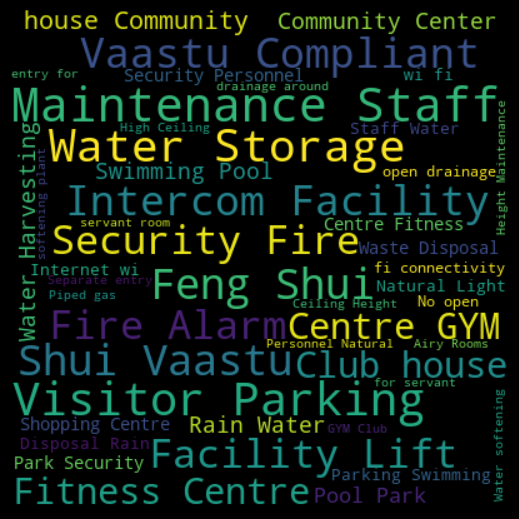

In [39]:
# Set the dark theme
plt.style.use('dark_background')

plt.rcParams["font.family"] = "Arial"

# Assuming you have 'feature_text' containing your text data
wordcloud = WordCloud(width=400, height=400, 
                      background_color='black',  # Change background color to black
                      stopwords=set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size=10).generate(feature_text)

# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(5, 5), facecolor=None)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.tight_layout(pad=0)

# Show the figure
plt.show()  # st.pyplot() if using Streamlit


In [38]:
plt.savefig('wordcloud.png')

<Figure size 640x480 with 0 Axes>

In [30]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [31]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")
fig.update_xaxes(range=[0, 13000])
# Show the plot
fig.show()

In [32]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [33]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



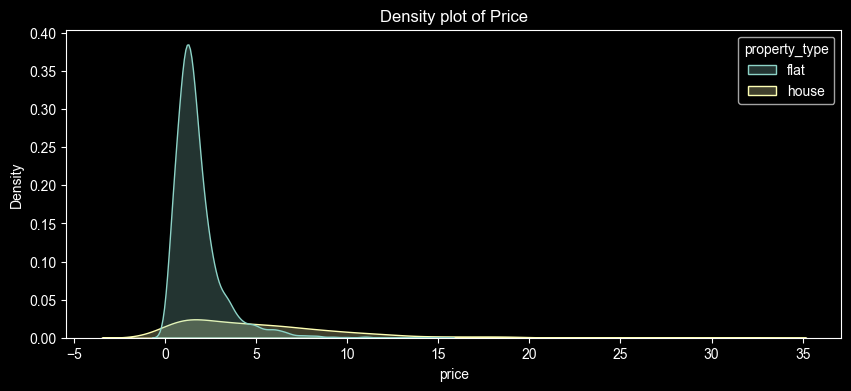

In [34]:
fig6 = plt.figure(figsize=(10, 4))
sns.kdeplot(data=new_df, x="price", hue="property_type", fill=True)  # Use kdeplot instead of displot
plt.title("Density plot of Price")
plt.show()

In [35]:
new_df['sector'].unique().tolist().insert(0,'overall')